In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.ticker as tick
%matplotlib widget

In [2]:
arr = np.genfromtxt('iris.data', delimiter=',', dtype=object)
#Columns: Sepal Length, Sepal Width, Petal Length, Petal Width, Species
arr[:5]

array([[b'5.1', b'3.5', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.9', b'3.0', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.1', b'1.5', b'0.2', b'Iris-setosa'],
       [b'5.0', b'3.6', b'1.4', b'0.2', b'Iris-setosa']], dtype=object)

In [3]:
x_train = arr[:, 3].astype(float)
y_train = arr[:, 2].astype(float)

Text(0, 0.5, 'Petal Length [cm]')

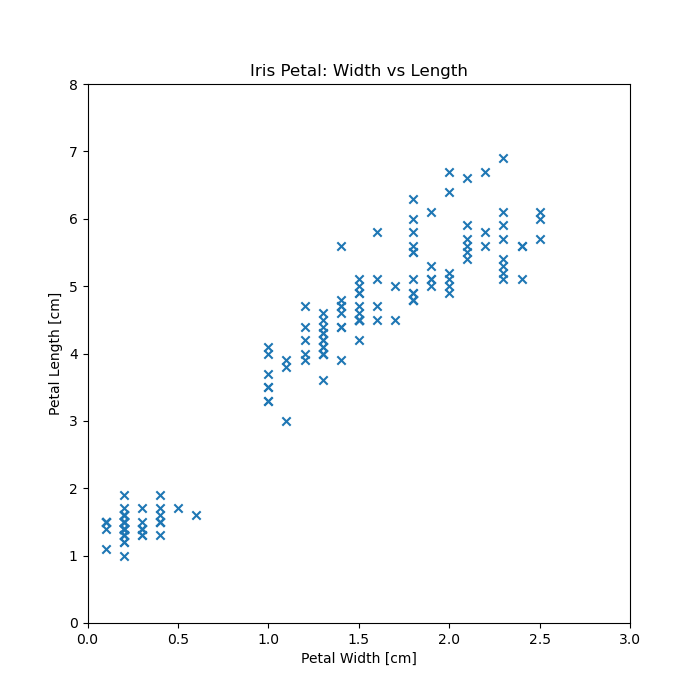

In [4]:
fig1 = plt.figure(dpi=100)
fig1.set_figheight(7)
fig1.set_figwidth(7)

ax1 = fig1.add_subplot(111)
ax1.scatter(x_train, y_train, marker = 'x')
ax1.set_xlim(0,3)
ax1.set_ylim(0,8)
ax1.set_title('Iris Petal: Width vs Length')
ax1.set_xlabel('Petal Width [cm]')
ax1.set_ylabel('Petal Length [cm]')

In [5]:
cost = lambda x,y,w,b : (1 / (2 * len(x))) * sum([(w * x[i] + b - y[i])**2 for i in range(len(x))])

In [6]:
w = np.arange(-200, 200, 1)
b = np.arange(-200, 200, 1)
w, b = np.meshgrid(w, b)
cost_z = cost(x_train, y_train,w,b)
lvls = [125,250,500,1000,2000,4000,8000,16000,32000,64000,128000,256000,512000]

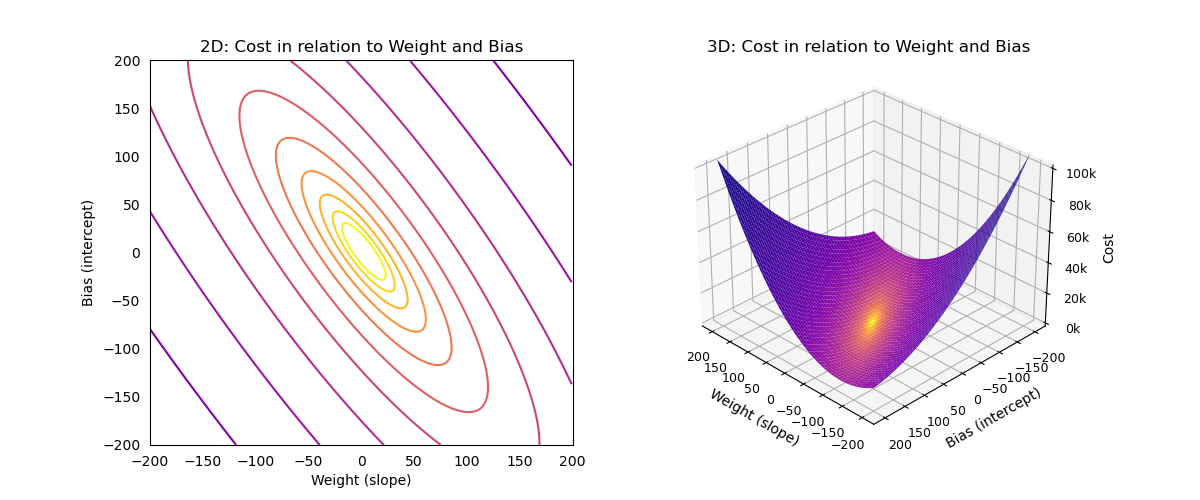

In [7]:
fig2 = plt.figure(dpi=100)
fig2.set_figheight(5)
fig2.set_figwidth(12)

# 2D - Cost contour plot
ax = fig2.add_subplot(1, 2, 1)
ax.contour(w, b, cost_z, lvls, cmap=plt.get_cmap('plasma_r'), norm = LogNorm())
ax.axis([-200, 200, -200, 200])
ax.set_title('2D: Cost in relation to Weight and Bias')
ax.set_xlabel('Weight (slope)')
ax.set_ylabel('Bias (intercept)')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')

# 3D - Cost surface plot
ax = fig2.add_subplot(1, 2, 2, projection='3d')
ax.set_title('3D: Cost in relation to Weight and Bias')
ax.set_xlabel('Weight (slope)')
ax.set_ylabel('Bias (intercept)')
ax.set_zlabel('Cost')
ax.tick_params(axis='x', which='major', labelsize=9)
ax.tick_params(axis='y', which='major', labelsize=9)
ax.tick_params(axis='z', which='major', labelsize=9)
ax.axes.set_zlim3d(bottom=0, top=100000) 
ax.zaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos : f'{x / 1000:.0f}k'))
ax.zaxis.label.set_rotation(90)
ax.plot_surface(w, b, cost_z, shade=True, cmap=plt.get_cmap('plasma_r'), norm = LogNorm())
ax.view_init(30, 135)


In [8]:
def gradient_wb(x, y, w, b):
    grd_w, grd_b = 0, 0
    n = len(x)
    for i in range(n):
        diff_yhat_y = w * x[i] + b - y[i]
        grd_w += diff_yhat_y * x[i]
        grd_b += diff_yhat_y
    return grd_w / n, grd_b / n

In [9]:
def gradient_descent(x, y, strt_w, strt_b, alpha, max_iter=10000):
    cost_hist, w_hist, b_hist = [], [], []
    w, b = strt_w, strt_b
    start, iter = True, 0

    while (round((grd:=gradient_wb(x, y, w, b))[0],3) != 0 or round(grd[1], 3) != 0) and iter < max_iter:
        w = w - alpha * grd[0]
        b = b - alpha * grd[1]

        cost_hist.append(cost(x, y, w, b))
        w_hist.append(w)
        b_hist.append(b)

        if start == True:
            print(f'START(iteration: {iter}), w: {round(w_hist[-1], 3)}, b: {round(b_hist[-1], 3)}, cost: {round(cost_hist[-1], 4)}')
            start = False

        if (0 < iter <= 100 and iter%10 == 0) or  (100 < iter <= 1000 and iter % 100 == 0) or (1000 < iter <= 10000 and iter % 1000 == 0):
            print(f'Iteration {iter}, w: {round(w_hist[-1], 3)}, b: {round(b_hist[-1], 3)}, cost: {round(cost_hist[-1], 4)}')
            prnt_counter = 0
    
        iter += 1

    print(f'Reached gradient w: {grd[0]:.3f}, and gradient b: {grd[1]:.3f}')
    print(f'END(iteration: {iter}), w: {round(w_hist[-1], 3)}, b: {round(b_hist[-1], 3)}, cost: {round(cost_hist[-1], 4)}')

    return w, b, cost_hist, w_hist, b_hist

In [10]:
w_optimum, b_optimum, cost_hist, w_hist, b_hist = gradient_descent(x_train, y_train,-150,-150,1.0e-2)

START(iteration: 0), w: -145.121, b: -146.664, cost: 58889.9258
Iteration 10, w: -103.332, b: -117.958, cost: 33377.1908
Iteration 20, w: -72.012, b: -96.207, cost: 18945.1463
Iteration 30, w: -48.563, b: -79.691, cost: 10780.0991
Iteration 40, w: -31.031, b: -67.115, cost: 6159.5746
Iteration 50, w: -17.947, b: -57.505, cost: 3543.8244
Iteration 60, w: -8.206, b: -50.13, cost: 2062.0123
Iteration 70, w: -0.977, b: -44.437, cost: 1221.617
Iteration 80, w: 4.364, b: -40.012, cost: 744.0805
Iteration 90, w: 8.289, b: -36.545, cost: 471.8556
Iteration 100, w: 11.149, b: -33.8, cost: 315.835
Iteration 200, w: 16.942, b: -22.362, cost: 79.6544
Iteration 300, w: 14.632, b: -17.708, cost: 52.3469
Iteration 400, w: 12.346, b: -14.19, cost: 34.6977
Iteration 500, w: 10.462, b: -11.342, cost: 23.013
Iteration 600, w: 8.928, b: -9.026, cost: 15.276
Iteration 700, w: 7.679, b: -7.142, cost: 10.153
Iteration 800, w: 6.664, b: -5.608, cost: 6.7609
Iteration 900, w: 5.837, b: -4.36, cost: 4.5149
Iter

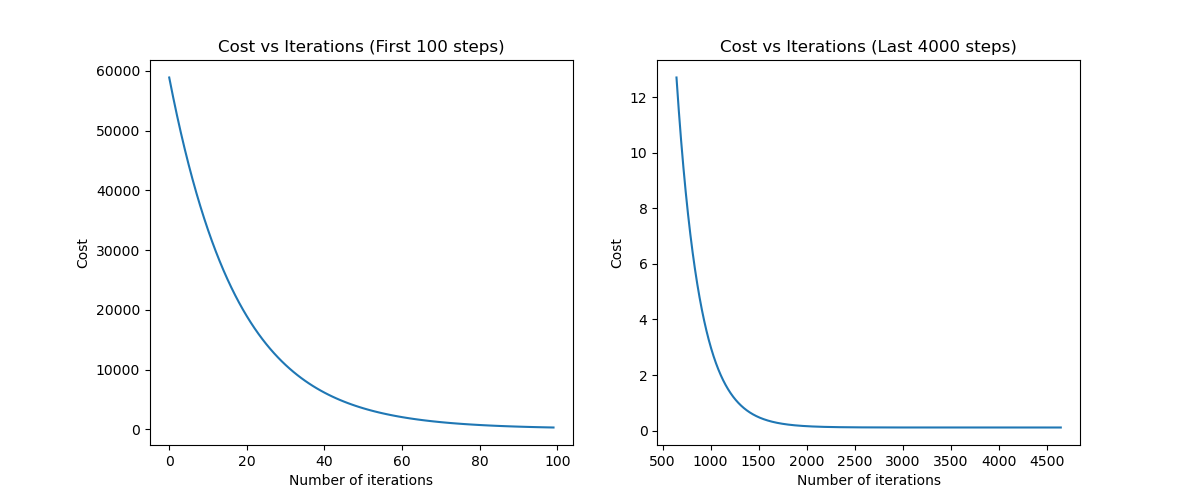

In [11]:
fig3 = plt.figure(dpi=100)
fig3.set_figheight(5)
fig3.set_figwidth(12)

ax1 = fig3.add_subplot(1, 2, 1)
ax1.set_title('Cost vs Iterations (First 100 steps)')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost')
plt.plot(np.arange(0,100,1), cost_hist[:100])

ax2 = fig3.add_subplot(1, 2, 2)
ax2.set_title('Cost vs Iterations (Last 4000 steps)')
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Cost')
plt.plot(np.arange(645,4645,1), cost_hist[645:])

plt.show()

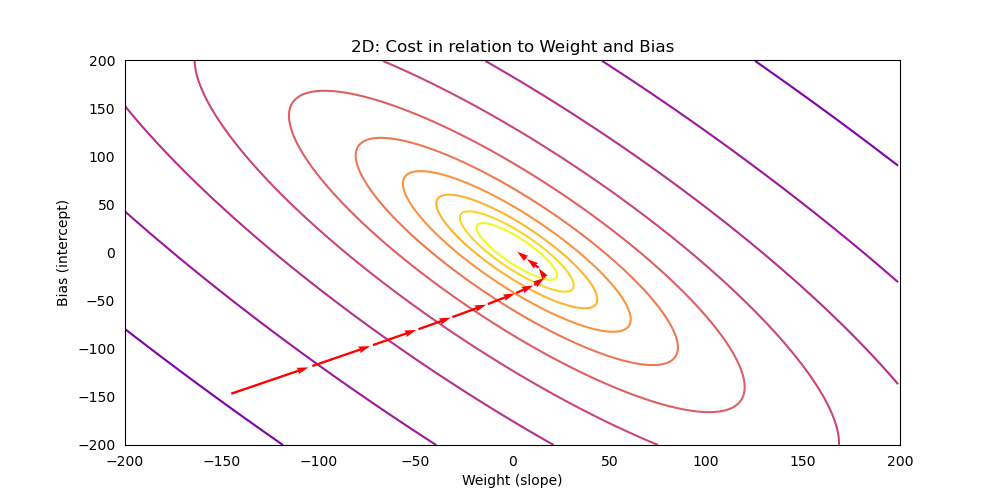

In [12]:
fig4 = plt.figure()
fig4.set_figheight(5)
fig4.set_figwidth(10)

# 2D - Cost contour plot
ax = fig4.add_subplot(1, 1, 1)
ax.contour(w, b, cost_z, lvls, cmap=plt.get_cmap('plasma_r'), norm = LogNorm())
ax.axis([-200, 200, -200, 200])
ax.set_title('2D: Cost in relation to Weight and Bias')
ax.set_xlabel('Weight (slope)')
ax.set_ylabel('Bias (intercept)')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')


for i in [(0,10), (10,10), (20,10), (30,10), (40, 15), (55,20), (75,25), (100,50), (150,200), (350,400),(750,3894)]:
    ax.quiver(w_hist[i[0]],b_hist[i[0]], w_hist[sum(i)] - w_hist[i[0]], b_hist[sum(i)] - b_hist[i[0]],
              scale_units='xy', 
              angles='xy', width=0.003, 
              minlength=1.5, 
              scale=1.05, 
              color='red',
              zorder = 2)
    
plt.show()

![regression_gif1](https://raw.githubusercontent.com/LucasOpoka/Machine_Learning/main/Univariate%20Linear%20Regression/regression_gif1.gif)

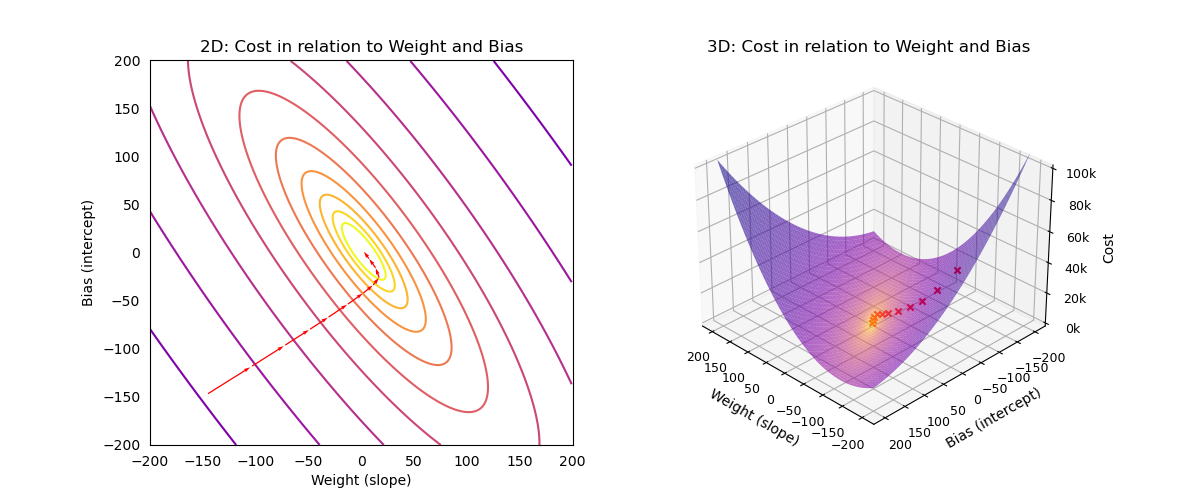

In [13]:
fig5 = plt.figure(dpi=100)
fig5.set_figheight(5)
fig5.set_figwidth(12)

# 2D - Cost contour plot
ax1 = fig5.add_subplot(121)
ax1.contour(w, b, cost_z, lvls, cmap=plt.get_cmap('plasma_r'), norm = LogNorm())
ax1.axis([-200, 200, -200, 200])
ax1.set_title('2D: Cost in relation to Weight and Bias')
ax1.set_xlabel('Weight (slope)')
ax1.set_ylabel('Bias (intercept)')
ax1.xaxis.set_ticks_position('none') 
ax1.yaxis.set_ticks_position('none')


# 3D - Cost surface plot
ax2 = fig5.add_subplot(1, 2, 2, projection='3d')
ax2.set_title('3D: Cost in relation to Weight and Bias')
ax2.set_xlabel('Weight (slope)')
ax2.set_ylabel('Bias (intercept)')
ax2.set_zlabel('Cost')
ax2.tick_params(axis='x', which='major', labelsize=9)
ax2.tick_params(axis='y', which='major', labelsize=9)
ax2.tick_params(axis='z', which='major', labelsize=9)
ax2.axes.set_zlim3d(bottom=0, top=100000) 
ax2.zaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos : f'{x / 1000:.0f}k'))
ax2.zaxis.label.set_rotation(90)
ax2.plot_surface(w, b, cost_z, shade=True, cmap=plt.get_cmap('plasma_r'), norm = LogNorm(), alpha = 0.6)
ax2.view_init(30, 135)

for i in [(0,10), (10,10), (20,10), (30,10), (40, 15), (55,20), (75,25), (100,50), (150,200), (350,400),(750,3894)]:

    ax1.quiver(w_hist[i[0]],b_hist[i[0]], w_hist[sum(i)] - w_hist[i[0]], b_hist[sum(i)] - b_hist[i[0]],
              scale_units='xy', 
              angles='xy', width=0.003, 
              minlength=1.5, 
              scale=1.05, 
              color='red',
              zorder = 2)
    
    ax2.scatter(w_hist[sum(i)], b_hist[(sum(i))], cost_hist[sum(i)] + 1, marker = 'x', color = 'red')

plt.show()

![regression_gif2](https://raw.githubusercontent.com/LucasOpoka/Machine_Learning/main/Univariate%20Linear%20Regression/regression_gif2.gif)

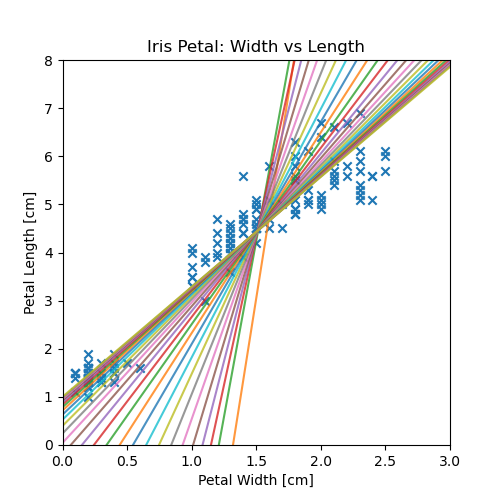

In [14]:
fig6 = plt.figure(dpi=100)
fig6.set_figheight(5)
fig6.set_figwidth(5)

# Scatter plot with regression lines
ax1 = fig6.add_subplot(111)
ax1.scatter(x_train, y_train, marker = 'x')
ax1.set_xlim(0, 3)
ax1.set_ylim(0, 8)
ax1.set_title('Iris Petal: Width vs Length')
ax1.set_xlabel('Petal Width [cm]')
ax1.set_ylabel('Petal Length [cm]')


for i in range(100,3000,100):
    x1, x2 = 0, 3
    y1, y2 = x1 * w_hist[i] + b_hist[i], x2 * w_hist[i] + b_hist[i]
    ax1.plot([x1, x2], [y1, y2], alpha = 0.8)

![regression_gif3](https://raw.githubusercontent.com/LucasOpoka/Machine_Learning/main/Univariate%20Linear%20Regression/regression_gif3.gif)